In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import glob
import pandas as pd


In [5]:
respath = glob.glob('/Users/Daigo/Data/ShadeRatio/Machida/2016_8_20_9-12/Exp_result/Exp3/*')
respath

['/Users/Daigo/Data/ShadeRatio/Machida/2016_8_20_9-12/Exp_result/Exp3/linear.pkl',
 '/Users/Daigo/Data/ShadeRatio/Machida/2016_8_20_9-12/Exp_result/Exp3/solar.pkl',
 '/Users/Daigo/Data/ShadeRatio/Machida/2016_8_20_9-12/Exp_result/Exp3/uGMM05.pkl',
 '/Users/Daigo/Data/ShadeRatio/Machida/2016_8_20_9-12/Exp_result/Exp3/uGMM10.pkl',
 '/Users/Daigo/Data/ShadeRatio/Machida/2016_8_20_9-12/Exp_result/Exp3/uGMM20.pkl']

In [4]:
with open('/Users/Daigo/Data/ShadeRatio/Machida/2016_8_20_9-12/pickles/ShadeRatio.pkl', 'rb') as f:
    data = pickle.load(f)

In [9]:
result = list()
for path in enumerate(respath):
    
    with open(path, 'rb') as f:
        result.append(pickle.load(f))

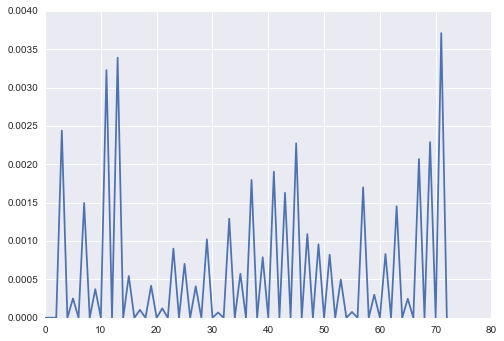

In [14]:
plt.plot(np.abs(np.mean(result[0] - data, axis=(1,2))))

In [28]:
result[2].shape

(73, 30, 30)

In [39]:
df = pd.DataFrame(columns=['objective', 'set_num', 'method'])

methods = ['linear', 'proposed', 'uGMM_5mix', 'uGMM_10mix', 'uGMM_20mix']

test_idxs = np.arange(1, 73, 2)

for method, res in zip(methods, result):
    for idx in test_idxs:
        
        if method == 'linear':
            val = np.mean((res[idx, 7:33, 7:33] - data[idx, 7:33, 7:33])**2)
        elif method == 'proposed':
            val = np.mean((res[idx] - data[idx, 7:33, 7:33])**2)
        else:
            val = np.mean((res[idx, 2:28, 2:28] - data[idx, 7:33, 7:33])**2)
                
        df2 = pd.DataFrame([[val, np.int(idx), method]], columns=df.columns)
                
        df = df.append(df2, ignore_index=True)

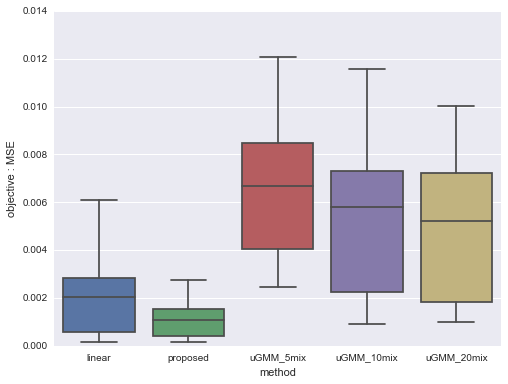

In [41]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(x = 'method', y = 'objective', data = df)
plt.ylabel('objective : MSE')
# sns.plt.savefig('/Users/Daigo/Desktop/tmp.png')

In [ ]:
! git add Consider.ipynb
! git commit -m 'dr'